<p style="font-family:Times New Roman; font-size:120%">
    -Aleksander Nistad Sekkelsten
</p>
<h1 style="font-family:Times New Roman; font-size: 300%"><center>  Project 2 Breast Cancer Wisconsin  Data Set</center></h1>
<p style="font-family:Times New Roman; font-size:120%">
    Here, analyze the Wisconsin Breast cancer dataset. I do some tuning on the data, and then do a manual back-prop. code, zygote gradient code, and a flux model on the dataset. I do this for a FFNN and logistic regression and compare.
</p>

In [1]:
import Pkg; Pkg.activate(".julia/environments/v1.10/Project.toml")
Pkg.add("MLDataUtils")
using CSV, DataFrames, Flux, Random, Statistics, MLDataUtils, Plots, Optimisers, NBInclude, Zygote
@nbinclude("FYS-STK 4155 Project 2 Methods .ipynb")
@nbinclude("FYS-STK 4155 Project 2 FFNN.ipynb")

  Activating project at `~/.julia/environments/v1.10`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


ConfusionMatrix (generic function with 2 methods)

In [2]:
df = CSV.read("/Users/aleksandersekkelsten/Downloads/data 2.csv", DataFrame)

┌ Warning: thread = 1 warning: only found 32 / 33 columns around data row: 1. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 32 / 33 columns around data row: 2. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 32 / 33 columns around data row: 3. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 32 / 33 columns around data row: 4. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 32 / 33 columns around data row: 5. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 1 warning: only found 32 / 33 columns around data row: 6. Filling remaining columns with `missing`
└ @ CSV ~/.julia/packages/

Row,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Column33
,Int64,String1,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Missing
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,missing
2,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,missing
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,missing
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,missing
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,missing
6,843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244,missing
7,844359,M,18.25,19.98,119.6,1040.0,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,missing
8,84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,missing
9,844981,M,13.0,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072,missing


In [3]:
first(df, 5)

Row,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Column33
,Int64,String1,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Missing
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,missing
2,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,missing
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,missing
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,missing
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,missing


In [4]:
names(df)

33-element Vector{String}:
 "id"
 "diagnosis"
 "radius_mean"
 "texture_mean"
 "perimeter_mean"
 "area_mean"
 "smoothness_mean"
 "compactness_mean"
 "concavity_mean"
 "concave points_mean"
 "symmetry_mean"
 "fractal_dimension_mean"
 "radius_se"
 ⋮
 "fractal_dimension_se"
 "radius_worst"
 "texture_worst"
 "perimeter_worst"
 "area_worst"
 "smoothness_worst"
 "compactness_worst"
 "concavity_worst"
 "concave points_worst"
 "symmetry_worst"
 "fractal_dimension_worst"
 "Column33"

In [5]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,id,3.03718e7,8670,906024.0,911320502,0,Int64
2,diagnosis,,B,,M,0,String1
3,radius_mean,14.1273,6.981,13.37,28.11,0,Float64
4,texture_mean,19.2896,9.71,18.84,39.28,0,Float64
5,perimeter_mean,91.969,43.79,86.24,188.5,0,Float64
6,area_mean,654.889,143.5,551.1,2501.0,0,Float64
7,smoothness_mean,0.0963603,0.05263,0.09587,0.1634,0,Float64
8,compactness_mean,0.104341,0.01938,0.09263,0.3454,0,Float64
9,concavity_mean,0.0887993,0.0,0.06154,0.4268,0,Float64


In [6]:

df_clean = dropmissing(df[:,1:end-1])

Row,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
,Int64,String1,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
2,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
6,843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244
7,844359,M,18.25,19.98,119.6,1040.0,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
8,84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151
9,844981,M,13.0,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072


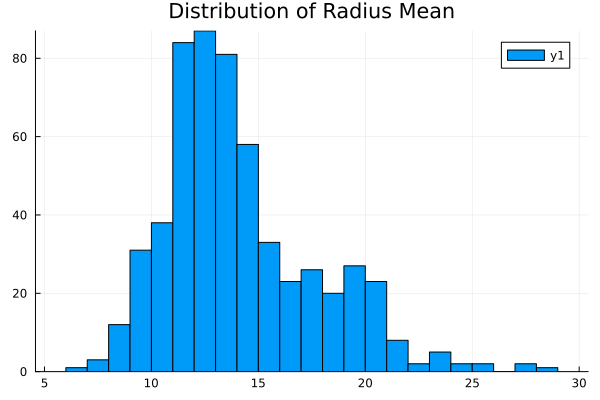

In [7]:
# Plot histogram for one feature
histogram(df[:, :radius_mean], bins=30, title="Distribution of Radius Mean")

In [9]:
# Split data
(train, test) = stratifiedobs((df[:, Not(:diagnosis)], df[1:end, :diagnosis]), 0.8)
X_train, y_train = train
X_train = X_train[:,1:end-1]
X_test, y_test = test
X_test = X_test[:,1:end-1]
X_train

Row,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,913505,19.44,18.82,128.1,1167.0,0.1089,0.1448,0.2256,0.1194,0.1823,0.06115,0.5659,1.408,3.631,67.74,0.005288,0.02833,0.04256,0.01176,0.01717,0.003211,23.96,30.39,153.9,1740.0,0.1514,0.3725,0.5936,0.206,0.3266,0.09009
2,8910748,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.0627,0.1904,0.5293,1.164,13.17,0.006472,0.01122,0.01282,0.008849,0.01692,0.002817,12.32,16.18,78.27,457.5,0.1358,0.1507,0.1275,0.0875,0.2733,0.08022
3,89382601,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,0.316,0.9115,1.954,28.9,0.005031,0.006021,0.005325,0.006324,0.01494,0.0008948,16.46,21.75,103.7,840.8,0.1011,0.07087,0.04746,0.05813,0.253,0.05695
4,911654,14.2,20.53,92.41,618.4,0.08931,0.1108,0.05063,0.03058,0.1506,0.06009,0.3478,1.018,2.749,31.01,0.004107,0.03288,0.02821,0.0135,0.0161,0.002744,16.45,27.26,112.1,828.5,0.1153,0.3429,0.2512,0.1339,0.2534,0.07858
5,8610404,16.07,19.65,104.1,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,0.7474,1.016,5.029,79.25,0.01082,0.02203,0.035,0.01809,0.0155,0.001948,19.77,24.56,128.8,1223.0,0.15,0.2045,0.2829,0.152,0.265,0.06387
6,912519,13.47,14.06,87.32,546.3,0.1071,0.1155,0.05786,0.05266,0.1779,0.06639,0.1588,0.5733,1.102,12.84,0.00445,0.01452,0.01334,0.008791,0.01698,0.002787,14.83,18.32,94.94,660.2,0.1393,0.2499,0.1848,0.1335,0.3227,0.09326
7,915691,13.4,20.52,88.64,556.7,0.1106,0.1469,0.1445,0.08172,0.2116,0.07325,0.3906,0.9306,3.093,33.67,0.005414,0.02265,0.03452,0.01334,0.01705,0.004005,16.41,29.66,113.3,844.4,0.1574,0.3856,0.5106,0.2051,0.3585,0.1109
8,866458,15.1,16.39,99.58,674.5,0.115,0.1807,0.1138,0.08534,0.2001,0.06467,0.4309,1.068,2.796,39.84,0.009006,0.04185,0.03204,0.02258,0.02353,0.004984,16.11,18.33,105.9,762.6,0.1386,0.2883,0.196,0.1423,0.259,0.07779
9,911384,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,0.2446,0.4334,1.826,23.31,0.003271,0.0177,0.0231,0.008399,0.01148,0.002379,17.18,18.22,112.0,906.6,0.1065,0.2791,0.3151,0.1147,0.2688,0.08273


In [10]:
XTrain = transpose(Matrix(X_train[:,2:end]))  # Transpose to have samples as columns
XTest = transpose(Matrix(X_test[:,2:end]))  # Transpose to have samples as columns

30×113 transpose(::Matrix{Float64}) with eltype Float64:
   19.19        20.44       14.47      …    8.196      15.05        21.1
   15.94        21.78       24.99          16.84       19.07        20.52
  126.3        133.8        95.81          51.71       97.26       138.1
 1157.0       1293.0       656.4          201.9       701.9       1384.0
    0.08694      0.0915      0.08837        0.086       0.09215      0.09684
    0.1185       0.1131      0.123     …    0.05943     0.08597      0.1175
    0.1193       0.09799     0.1009         0.01588     0.07486      0.1572
    0.09667      0.07785     0.0389         0.005917    0.04335      0.1155
    0.1741       0.1618      0.1872         0.1769      0.1561       0.1554
    0.05176      0.05557     0.06341        0.06503     0.05915      0.05661
    1.0          0.5781      0.2542    …    0.1563      0.386        0.6643
    0.6336       0.9168      1.079          0.9567      1.198        1.361
    6.971        4.218       2.615       

In [11]:
yTrain = replace(y_train, "M" => 1.0, "B" => 0.0)
yTest = replace(y_test, "M" => 1.0, "B" => 0.0)

yTrain = reshape(yTrain, 1,:)
yTest = reshape(yTest, 1,:)

1×113 reshape(::PooledArrays.PooledVector{Any, UInt32, Vector{UInt32}}, 1, 113) with eltype Any:
 1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  …  1.0  0.0  0.0  1.0  0.0  1.0  1.0

In [1]:
# Compute the mean and standard deviation for each feature (row)
feature_means = mean(XTrain, dims=2)
feature_stds = std(XTrain, dims=2)

# Avoid division by zero in case any feature has zero standard deviation
feature_stds[feature_stds .== 0.0] .= 1.0

# Normalize XTrain
XTrain_normalized = (XTrain .- feature_means) ./ feature_stds

# Compute the mean and standard deviation for each feature (row)
feature_means = mean(XTest, dims=2)
feature_stds = std(XTest, dims=2)

# Avoid division by zero in case any feature has zero standard deviation
feature_stds[feature_stds .== 0.0] .= 1.0

# Normalize XTrain
XTest_normalized = (XTest .- feature_means) ./ feature_stds


LoadError: UndefVarError: mean not defined

In [24]:
Method = "FFNN"
input_dimension = 30
output_dimension = 1
epochs = 300
batch_size = 80
η = 1e-3

if Method=="FFNN"
    #FFNN
    outs = [64, output_dimension] # FFNN
    activation_functions = [ReLU,Sigmoid]
    model = Chain(
        Dense(size(XTrain, 1), 64, ReLU),
        Dense(64, 1, sigmoid), # FFNN with hidden layer
      # Sigmoid activation for binary classification
    )
else
    #Logistic Regression
    # Define the neural network model
    model = Chain(
        Dense(size(XTrain, 1), 1, sigmoid) 
    )
    outs = [output_dimension]
    activation_functions = [Sigmoid]
end

Chain(
  Dense(30 => 64, ReLU),                # 1_984 parameters
  Dense(64 => 1, σ),                    # 65 parameters
)                   # Total: 4 arrays, 2_049 parameters, 8.254 KiB.

In [25]:
# Loss function: Binary cross-entropy
loss4(model, input, y_true) = Flux.Losses.logitbinarycrossentropy(model(input), y_true)
# Optimizer: Adam optimizer
opt = Flux.setup(Optimisers.ADAM(0.0001), model)  # Learning rate of 0.01

# Number of epochs and batch size

num_samples = size(XTrain, 2)
num_batches = ceil(Int, num_samples / batch_size)

# Training loop
for epoch in 1:epochs
    for j in 1:num_batches
        # Batch indices
        a = batch_size * (j - 1) + 1
        b = min(batch_size * j, num_samples)

        # Get batch data
        input = XTrain_normalized[:, a:b]
        label = yTrain[:,a:b]

        # Compute gradients
        grads = gradient(m -> loss4(m,input, label), model)[1]
        # Update model parameters
        Flux.Optimise.update!(opt, model, grads)
    end

    # Print loss every 10 epochs
    if epoch % 50 == 0
        test_loss = loss4(model,XTest_normalized, yTest)
        println("Epoch $epoch Loss: ", test_loss)
    end
end


Epoch 50 Loss: 0.6249120046293973
Epoch 100 Loss: 0.6000423822263503
Epoch 150 Loss: 0.5902358520392532
Epoch 200 Loss: 0.5848142278170912
Epoch 250 Loss: 0.5812473426359787
Epoch 300 Loss: 0.5787527924730483


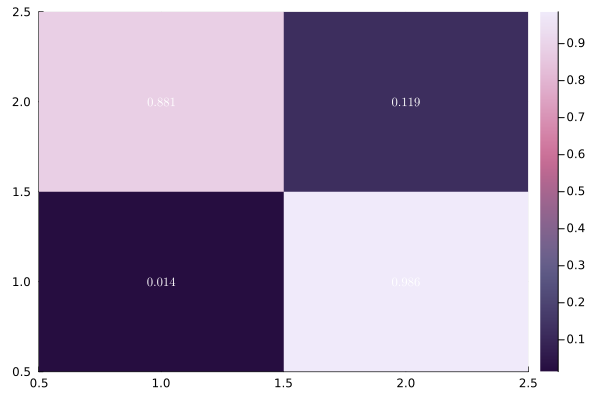

In [26]:
cm, labels = ConfusionMatrix(model,XTest_normalized,yTest)
heatmap(cm, cmap=:acton)
annotate!([(j, i, text(round(cm[i,j],digits=3), 8,"Computer Modern",:white)) for i in 1:2 for j in 1:2])

<h2 style="font-family:Times New Roman; font-weight:bolder; font-size:240%">Manual training, Zygote Gradient</h2>


In [16]:
x_trainM = XTrain_normalized'
x_testM = XTest_normalized'
yTrainM = yTrain'
yTestM = yTest'

113×1 adjoint(reshape(::PooledArrays.PooledVector{Any, UInt32, Vector{UInt32}}, 1, 113)) with eltype Any:
 1.0
 1.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 ⋮
 1.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 0.0
 1.0
 0.0
 1.0
 1.0

In [17]:
function binary_cross_entropy_loss(x_batch, layers, activation_funcs, y_true)
    # Step 1: Perform feed-forward to get predicted value (y_pred)
    y_pred = feed_forward_batched(layers, x_batch, activation_funcs; backprop=false)
    
    # Step 2: Apply sigmoid activation (for binary classification)
    #y_pred = σ.(y_pred)  # Element-wise sigmoid

    # Step 3: Ensure numerical stability by clipping
    eps = 1e-15
    y_pred_clipped = clamp.(y_pred, eps, 1.0 - eps)

    # Step 4: Compute the binary cross-entropy loss
    ce_loss = -mean(y_true .* log.(y_pred_clipped) .+ (1 .- y_true) .* log.(1 .- y_pred_clipped))
    
    return ce_loss
end


binary_cross_entropy_loss (generic function with 1 method)

In [18]:
function trainer(x_train,y_train, x_test, y_test, layers, activation_funcs, learning_rate=0.01, epochs=1000; batch_size, optimizer, loss)
    num_batches=Int(round(length(y_train)/batch_size))
    batch_size=80
    params = initialize(optimizer, layers, learning_rate, num_batches,batch_size;γ=0.9)
    lossHistory = []
    
    for epoch in 1:epochs
        (layers, params) = optimizer(x_train, y_train, layers,  activation_funcs,loss, params)
        if epoch%20==0
            test_loss=loss(x_test, layers, activation_funcs, y_test)
            println("Epoch:  ", epoch, "  Loss: ", test_loss)
            push!(lossHistory, test_loss)
        end
    end
    return layers, lossHistory
end


trainer (generic function with 3 methods)

In [19]:
println(" ------  Training SGD  ------")
layers = create_layers_batch(input_dimension, outs)
layersSGD,lossSGD = trainer(x_trainM, yTrainM, x_testM, yTestM, layers, activation_functions, η, epochs; batch_size=batch_size, optimizer=SGD!, loss=binary_cross_entropy_loss)
β_SGD=feed_forward_batched(layersSGD, x_testM, activation_functions;backprop=false)

println(" ------  Training RMSProp  ------")
layers = create_layers_batch(input_dimension, outs)
layersRMSProp, lossRMSProp = trainer(x_trainM, yTrainM, x_testM, yTestM, layers, activation_functions, η, epochs; batch_size=batch_size, optimizer=RMSProp!, loss=binary_cross_entropy_loss)
β_RMSProp = feed_forward_batched(layersRMSProp, x_testM, activation_functions;backprop=false)

println(" ------  Training Momentum  ------")
layers = create_layers_batch(input_dimension,outs)
layersMomentum, lossMomentum = trainer(x_trainM, yTrainM, x_testM, yTestM, layers, activation_functions, η, epochs; batch_size=batch_size, optimizer=Momentum!, loss=binary_cross_entropy_loss)
β_Momentum = feed_forward_batched(layersMomentum, x_testM, activation_functions;backprop=false)

println(" ------  Training ADAGrad  ------")
layers = create_layers_batch(input_dimension, outs)
layersADAGrad,lossADAGrad = trainer(x_trainM, yTrainM, x_testM, yTestM, layers, activation_functions, η, epochs; batch_size=batch_size, optimizer=AdaGrad!, loss=binary_cross_entropy_loss)
β_ADAGrad = feed_forward_batched(layersADAGrad, x_testM, activation_functions;backprop=false)
println(" ------  Training ADAM  ------")
layers = create_layers_batch(input_dimension,outs)
layersADAM, lossADAM = trainer(x_trainM, yTrainM, x_testM, yTestM, layers, activation_functions, η, epochs; batch_size=batch_size, optimizer=ADAM!, loss=binary_cross_entropy_loss)
β_ADAM = feed_forward_batched(layersADAM, x_testM, activation_functions;backprop=false)


 ------  Training SGD  ------
Epoch:  20  Loss: 2.1526387620149623
Epoch:  40  Loss: 1.6019547988865437
Epoch:  60  Loss: 1.3932962154170883
Epoch:  80  Loss: 1.260823725667366
Epoch:  100  Loss: 1.1684263780333468
Epoch:  120  Loss: 1.092561193260005
Epoch:  140  Loss: 1.0016937446312917
Epoch:  160  Loss: 0.9249754329901988
Epoch:  180  Loss: 0.8714516934047896
Epoch:  200  Loss: 0.8371300263646279
Epoch:  220  Loss: 0.8054349738346746
Epoch:  240  Loss: 0.7739243103255782
Epoch:  260  Loss: 0.7431116148613245
Epoch:  280  Loss: 0.7186297165902552
Epoch:  300  Loss: 0.7009390145427381
 ------  Training RMSProp  ------
Epoch:  20  Loss: 2.7835466135095803
Epoch:  40  Loss: 1.3905129635016404
Epoch:  60  Loss: 1.1453999225954223
Epoch:  80  Loss: 1.2132374183261432
Epoch:  100  Loss: 1.19245469677754
Epoch:  120  Loss: 1.1480890288084957
Epoch:  140  Loss: 1.099697769162498
Epoch:  160  Loss: 1.0601302598194908
Epoch:  180  Loss: 1.0188404216853615
Epoch:  200  Loss: 0.9835559947562955

113×1 Matrix{Float64}:
 0.9999999901501287
 0.9999999999999998
 0.9996612763219563
 0.999992381436855
 0.9999999999982752
 5.0048553075106425e-8
 0.8423876157411396
 7.909320021014683e-11
 2.108982730721372e-8
 1.0
 0.00016091817194844262
 2.554691971540472e-11
 3.560785278224242e-5
 ⋮
 1.0
 0.9999999999999998
 8.758836740302148e-11
 0.9999999999775582
 2.4797663375391493e-11
 0.9919992068637179
 2.743706290846165e-13
 2.1019252802398204e-9
 1.0
 1.589553643166426e-12
 0.7359082939164803
 1.0

In [20]:
# Convert predictions to binary labels (threshold at 0.5)
predictions_binary_normalized = β_ADAM .> 0.5

# Calculate accuracy
accuracy_normalized = sum(predictions_binary_normalized .== yTestM) / length(yTestM)
println("Test Accuracy with Normalized Data: $(accuracy_normalized * 100)%")

Test Accuracy with Normalized Data: 94.69026548672566%


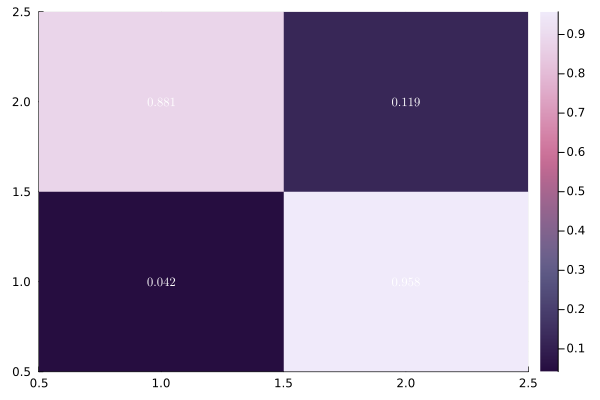

In [21]:
cm, labels = ConfusionMatrix(layersSGD,x_testM,yTest, activation_functions)
heatmap(cm, cmap=:acton)
annotate!([(j, i, text(round(cm[i,j],digits=3), 8,"Computer Modern",:white)) for i in 1:2 for j in 1:2])

<h2 style="font-family:Times New Roman; font-weight:bolder; font-size:240%">Manual Training, Manual Backprop</h2>


In [22]:
num_batches = Int(round(length(yTrain)/batch_size))
layers = create_layers_batch(input_dimension, outs)
for i in 1:epochs
    for j in 1:num_batches
        # Get batch data
        input, label = batch(x_trainM, yTrainM, num_batches, batch_size, j)
        
        output, backs = feed_forward_batched(layers, input, activation_functions; backprop=true)
        layers = BackwardsPropagation(layers, label, backs, activation_functions,0.001)
    end
    if i%100==0
        println("Epoch: $i Loss: ", binary_cross_entropy_loss(x_testM, layers, activation_functions, yTestM))
    end
end

Epoch: 100 Loss: 1.1292131195050343
Epoch: 200 Loss: 0.7585699389124885
Epoch: 300 Loss: 0.5355329178417151


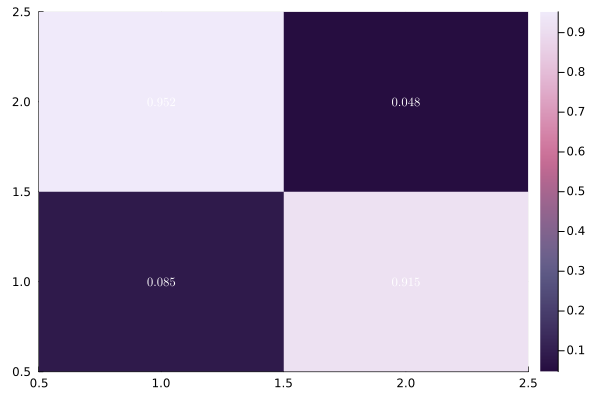

In [27]:
cm, labels = ConfusionMatrix(layers,x_testM,yTest, activation_functions)
heatmap(cm, cmap=:acton)
annotate!([(j, i, text(round(cm[i,j],digits=3), 8,"Computer Modern",:white)) for i in 1:2 for j in 1:2])